## Libraries

In [29]:
import os
import sys
import matplotlib.pyplot as plt
from Bio import SeqIO

# Custom functions
python_dir_path = os.path.join('..', 'scripts', 'python')
sys.path.append(python_dir_path)
from subset_pr2_database import creating_df_from_alignment, subset_fasta_based_on_dataframe, subset_sequences_by_taxon

## Variables

In [17]:
project = 'Suthaus_2022'
marker = 'Full18S'
sim = 'sim90'
denoise_method = 'RAD'
raw_data = os.path.join('..', 'raw_data')
ref_align_dir = os.path.join(raw_data, 'reference_alignments', 'pr2')
subset_align_dir = os.path.join(raw_data, 'reference_alignments', 'pr2_subset')
pr2 = os.path.join(raw_data, ref_align_dir, 'pr2_version_5.0.0_SSU_UTAX.fasta')

# Keeping only nuclear eukaryotic sequences from the PR2 sequence database

In [9]:
# Checking the PR2 taxonomy file to find out what taxa are included in the alignment
alignment_path = os.path.join(ref_align_dir, 'pr2_version_5.0.0_SSU_UTAX.fasta')

df = creating_df_from_alignment(alignment_path = alignment_path)

In [10]:
df.head(5)

,ID,kingdom,domain,phylum,class,order,family,genus,species
0,AB353770.1.1740_U,Eukaryota,TSAR,Alveolata-Dinoflagellata,Dinophyceae,Peridiniales,Kryptoperidiniaceae,Unruhdinium,Unruhdinium_kevei
1,AB284159.1.1765_U,Eukaryota,TSAR,Alveolata-Dinoflagellata,Dinophyceae,Peridiniales,Protoperidiniaceae,Protoperidinium,Protoperidinium_bipes
2,AY123745.1.924_UC,Eukaryota,Obazoa,Opisthokonta-Fungi,Ascomycota,Pezizomycotina,Sordariomycetes,Sordariomycetes_X,Sordariomycetes_X_sp.
3,FJ355953.1.1907_U,Eukaryota,Obazoa,Opisthokonta-Fungi,Ascomycota,Pezizomycotina,Eurotiomycetes,Knufia,Knufia_epidermidis
4,EU174976.1.853_U,Eukaryota,Obazoa,Opisthokonta-Fungi,Ascomycota,Pezizomycotina,Sordariomycetes,Sordariomycetes_X,Sordariomycetes_X_sp.


In [11]:
df['kingdom'].unique()

array(['Eukaryota', 'Eukaryota:apic', 'Eukaryota:plas', 'Bacteria',
       'Eukaryota:chro', 'Eukaryota:nucl', 'Eukaryota:mito', 'Archaea'],
      dtype=object)

We can see there are Bacteria and Archaea as two distinct domains of prokaryotes. Given that our interest is in **eukaryotic sequences**, I want to filter these out.
Also there are sequences from different organelles:
- **nucleus**: This represents sequences from the main cellular DNA in the nucleus of eukaryotes.
- **nucleomorph:nucl**: Nucleomorphs are the remnant nuclei of eukaryotic algae that were engulfed by other eukaryotes.
- **plastid:plas**: Plastids are the family of organelles in plant cells that includes chloroplasts.
- **apicoplast:apic**: Apicoplasts are a type of plastid found in Apicomplexa, the parasitic protozoans.
- **chromatophore:chrom**: Chromatophores are pigment-containing organelles observed in some bacteria and other organisms.
- **mitochondrion:mito**: Mitochondria are the energy-producing organelles in eukaryotic cells.

But our main interest lies in nuclear eukaryotic sequences, so we can filter the dataframe to retain only those rows where the kingdom column value is **'Eukaryota'**.

In [12]:
# Filter dataframe to retain only nuclear eukaryotic sequences
df_eukaryota_nuclear = df[df['kingdom'] == 'Eukaryota']

In [13]:
print(f'''
Length of original df: {len(df)}
Length of filtered df: {len(df_eukaryota_nuclear)}
''')


Length of original df: 221085
Length of filtered df: 204238



In [20]:
# Filter the original PR2 dataframe keeping only nuclear eukaryotic sequences (pr2_version_5.0.0_SSU_UTAX_euknucl.fasta)
fasta_path = pr2
output_file = os.path.join(subset_align_dir, 'pr2_version_5.0.0_SSU_UTAX_euknucl.fasta')


subset_fasta_based_on_dataframe(fasta_path = fasta_path,
                                output_path = output_file,
                                dataframe = df_eukaryota_nuclear)

# Subsetting PR2 alignment

PR2 dataset is still way too big for our purposes, which is to check the overall phylogenetic diversity of our query sequences. Therefore, we will subset the PR2 database (this will also reduce computational load), but we will keep the taxonomic diversity/balance.

So, we will keep a maximum of limited occurrences per taxonomic level (e.g. max 3 occurrences per genus) to retain diversity while significantly reducing the size of the alignment.

In [23]:
# Define your parameters
input_file = os.path.join(subset_align_dir, 'pr2_version_5.0.0_SSU_UTAX_euknucl.fasta')
output_file = os.path.join(subset_align_dir, 'pr2_version_5.0.0_SSU_UTAX_euknucl_subset.fasta')

# Use the subsetting function
subset_sequences_by_taxon(input_file_path = input_file, 
                          output_file_path = output_file, 
                          tax_level = 'f', # Subset based on the family taxonomic level
                          limit = 1, # Keep only 1 occurance of a unique family
                          min_length = 1500,
                          max_length = 2000, # Filter out sequences longer than 3000 bp
                          log_file = 'pr2_version_5.0.0_SSU_UTAX_euknucl_subset.log') # Name of the log file

2023-10-25 14:09:24,686 - INFO - Starting subsetting sequences...
2023-10-25 14:09:24,697 - INFO - Using input file: ../raw_data/reference_alignments/pr2_subset/pr2_version_5.0.0_SSU_UTAX_euknucl.fasta
2023-10-25 14:09:24,698 - INFO - Writing to output file: ../raw_data/reference_alignments/pr2_subset/pr2_version_5.0.0_SSU_UTAX_euknucl_subset.fasta
2023-10-25 14:09:24,700 - INFO - Taxonomic level: f
2023-10-25 14:09:24,701 - INFO - Limit per taxonomic group: 1
2023-10-25 14:09:24,701 - INFO - Maximum sequence length: 2000
2023-10-25 14:09:24,709 - INFO - Processed 1000 sequences...
2023-10-25 14:09:24,720 - INFO - Processed 2000 sequences...
2023-10-25 14:09:24,727 - INFO - Processed 3000 sequences...
2023-10-25 14:09:24,734 - INFO - Processed 4000 sequences...
2023-10-25 14:09:24,742 - INFO - Processed 5000 sequences...
2023-10-25 14:09:24,749 - INFO - Processed 6000 sequences...
2023-10-25 14:09:24,755 - INFO - Processed 7000 sequences...
2023-10-25 14:09:24,765 - INFO - Processed 80

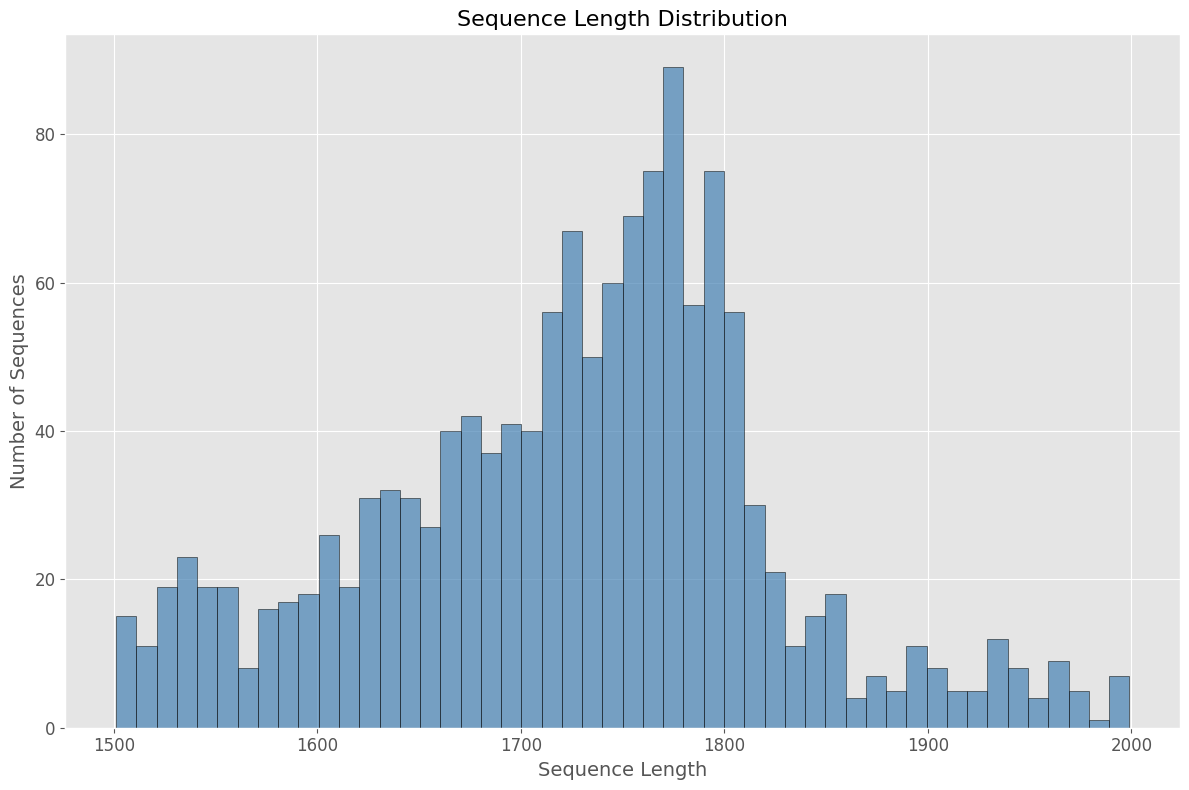

In [31]:
# Check the length distribution of the sequences in our subsetted fasta file

# Read in the sequences
file_path = os.path.join(subset_align_dir, 'pr2_version_5.0.0_SSU_UTAX_euknucl_subset.fasta')
sequences = list(SeqIO.parse(file_path, "fasta"))

# Get the lengths of the sequences
lengths = [len(seq.seq) for seq in sequences]

# Plotting

# Using a style for better aesthetics
plt.style.use('ggplot')

# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Plotting
plt.hist(lengths, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
plt.title("Sequence Length Distribution", fontsize=16)
plt.xlabel("Sequence Length", fontsize=14)
plt.ylabel("Number of Sequences", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()